# 3-3. 記述統計によるデータの把握

## データの個数や形

In [1]:
import numpy as np
import pandas as pd

In [2]:
# あやめデータの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

target_name_data = []
for target in iris.target:
    target_name_data.append(iris['target_names'][target])
iris_df['target'] = np.array(target_name_data)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# データの個数や型を確認
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# データの形を確認
iris_df.shape

(150, 5)

## 量的データと質的データ
データ（列）がどのようなタイプかを把握すると分析を進めやすい

- 量的データ ... 四則演算が適用可能（体重、売り上げなど）
- 質的データ ... 四則演算が適用できない（性別、顧客の住所など）

In [6]:
# 量的データの例
iris_df['sepal length (cm)'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [7]:
# 質的データの例
iris_df.target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

## 記述統計

### 基本的な要約統計量: 平均・中央値・最頻値

- 平均 ... $ 平均\overline{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $
- 中央値 ... データを小さい順に並べたとき中央に位置する値
- 最頻値 ... 最も頻繁に出現する値

In [8]:
# 平均
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].mean()

5.005999999999999

In [9]:
# 中央値
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].median()

5.0

In [10]:
# 最頻値
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].mode()

0    5.0
1    5.1
dtype: float64

### 基本的な要約統計量: 分散・標準偏差

$$ 分散\sigma^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \overline{x})^2 $$

$$ 標準偏差\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_i - \overline{x})^2} $$

In [11]:
# 分散
iris_df['sepal length (cm)'].var()

0.6856935123042505

In [12]:
# 標準偏差
iris_df['sepal length (cm)'].std()

0.8280661279778629

### ヒストグラム（分布）
量的データについてその上限と加減をいくつかの区間で区切った複数の区間(＝bins)について、それぞれの区間でどれだけのデータがあるかを集計して可視化したもの

In [13]:
# ライブラリの読み込み
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

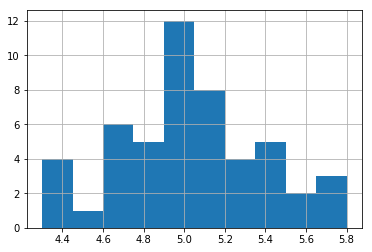

In [14]:
# 可視化
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].hist(bins=10)

### パーセンタイル値
量的データを小さい順に並べた時に、下からN%の順位にある値をパーセンタイル値と言う

In [15]:
# 25, 50, 75%はよく使われる
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length (cm), dtype: float64

## 2つの変数の関係

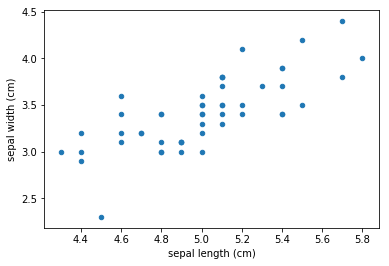

In [16]:
# 散布図
iris_df[iris_df.target == 'setosa'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')

### 相関係数
2つの変数xとyがどのくらい関連して変動しているかを-1〜1で表す

$$
相関係数r_{xy} = 
\frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}
{{\sqrt{ \sum_{i=1}^{n}(x_i - \overline{x})^2}}
{\sqrt{\sum_{i=1}^{n}(y_i - \overline{y})^2}}}
$$


In [17]:
# 相関係数
import scipy

In [18]:
# 相関係数とp値が求められる
scipy.stats.pearsonr(iris_df[iris_df.target == 'setosa']['sepal length (cm)'], iris_df[iris_df.target == 'setosa']['sepal width (cm)'])

(0.7467803732639268, 4.751986580148956e-10)